<font size="6">Языковое моделирование</font>

Языковые модели — важнейшая часть современного NLP. Практически во всех задачах, связанных с обработкой текста, напрямую или косвенно используются языковые модели. А наиболее известные недавние прорывы в области — это по большей части новые подходы к языковому моделированию. ELMO, BERT, GPT — это языковые модели.

## Что такое языковая модель?

Предположим, у нас есть модель поезда. Чем она отличается от настоящего поезда?
- обладает некоторыми свойствами поезда (выглядит как он)
- может вести себя аналогично поезду
- хорошие модели обладают большим количеством вышеперечисленных качеств

<div align="center">
    <table >
     <tr>
       <td>
       
<center><img src ="https://i.postimg.cc/R0VNtBMc/train1.jpg" width="250"></center>

<em>Нереалистичная модель</em>

</td>

<td>

<center><img src ="https://i.ibb.co/HgM1VcB/train2.jpg" width="450"></center>

<em>Реалистичная модель</em>


</td>
     </tr>
    </table>
    </div>

Аналогично — модель физического мира: построить некоторую конструкцию и понять, упадет ли она, какая будет траектория падения.
- позволяет понять, какие события лучше согласуются с окружающим миром, какие более вероятны
- может предсказать, что произойдет, учитывая некоторый "контекст"

<center><img src ="https://i.ibb.co/hWLWzJH/physical-model.jpg" width="700"></center>

То же самое с языком. Языковая модель должна обладать какими-то свойствами языка и предсказывать вероятность события (текста, предложения, токена, символа) в некотором контексте.

<div align="center">
    <table >
     <tr>
       <td>
       
<center><img src ="https://i.ibb.co/d4hGRhY/keyboard.png" width="400"></center>

<em>Клавиатура смартфона</em>

</td>

<td>

<center><img src ="https://i.ibb.co/TwD1Ryb/search.png" width="600"></center>

<em>Поисковый запрос</em>


</td>
     </tr>
    </table>
    </div>

Если модель способна предсказать вероятность следующего слова, то она уже достаточно много знает о языке.

*Я люблю вкусную ...*

На месте пропуска должно стоять неодушевленное существительное женского рода в винительном падеже, которое обозначает нечто съедобное (*еду, колбасу, рыбу* и т.д.).

## Как вычислить вероятность предложения?

Пусть у нас есть несколько цветных шаров. Как подсчитать вероятность вытащить зеленый шар?



<div align="center">
    <table >
     <tr>
       <td>
       
<center><img src ="https://i.ibb.co/bB27GRc/balls.jpg" width="350"></center>

<em>$$ \frac {5}{5+5+5+5}= \frac {1}{4}$$</em>

</td>

</tr>
</table>
</div>

Попробуем сделать то же самое для подсчета вероятности предложений.

$$ 1.\,P(\text {Colorless green ideas sleep furiously}) = \frac {0}{|\text{corpus}|} = 0$$

$$ 2.\,P(\text {Furiously sleep ideas green colorless}) = \frac {0}{|\text{corpus}|} = 0$$

При таком подходе предложения, которые никогда не встречались в корпусе, будут иметь нулевую вероятность. Однако языковая интуиция подсказывает, что предложение 1 должно быть более вероятным, чем предложение 2.

Мы не сможем надежно оценить вероятности предложений, если будем рассматривать их как неделимые сущности. Можно оценивать вероятность не всего предложения целиком, а каждого из входящих в него слов в определенном контексте.

<center><img src ="https://i.ibb.co/XL48yhW/sentence.png" width="700"></center>

Языковая модель оценивает вероятность встретить предложение $S$ — последовательность слов $(w_1,\cdots ,w_n)$. Вероятность предложения можно определить как произведение вероятности каждого слова с учетом предыдущих слов:
$$P(w_1,w_2, \dots, w_n) = P(w_1)P(w_2|w_1)P(w_3|w_1,w_2)\dots P(w_n|w_1,w_2,\dots,w_{n-1})= \prod\limits_{i = 1}^n P(w_i|w_1, \dots, w_{i-1})$$
Для каждого слова последовательности предсказывается вероятность встретить его в тексте при условии, что известно предыдущее слово: $w_2$ при условии $w_1$, $w_3$ при условии $w_1$ и $w_2$, и т.д.

### N-граммные языковые модели

Истинные вероятности предложений неизвестны → можно обучить языковую модель оценивать эти вероятности. Вероятность рассчитывается на основе частоты встречаемости слов в корпусе текстов:
$$P (w_i|w_1, w_2, \dots, w_{i-1}) = \frac{count(w_1, w_2, \dots, w_i)}{count(w_1, w_2, \dots, w_{i-1})}$$

Однако снова возникнет проблема, что большинство последовательностей $w_1, \dots, w_i$ не встречаются в корпусе.

Можно воспользоваться [марковским свойством](https://en.wikipedia.org/wiki/Markov_property):

- Вероятность слова зависит только от конечного количества предыдущих слов.

Такие языковые модели называются *n-граммными*:

$$P (w_i|w_1, w_2, \dots, w_{i-1}) = P (w_i|w_{i-(n-1)}, \dots, w_{i-1}) = \frac{count(w_{i-(n-1)}, \dots, w_{i-1}, w_{i})}{count(w_{i-(n-1)}, \dots, w_{i-1})}$$

*Биграммные* языковые модели — $n = 2$:
$$ P (w_i|w_1, w_2, \dots, w_{i-1}) = P (w_i|w_{i-1}) = \frac{count(w_{i-1}, w_{i})}{count(w_{i-1})}$$

$$ P(\text {Where are we going}) = P(\text {where}) \times P(\text {are|where}) \times P(\text {we|are}) \times P(\text{going|we})$$

*Триграммные* языковые модели — $n = 3$:
$$ P (w_i|w_1, w_2, \dots, w_{i-1}) = P (w_i|w_{i-2}, w_{i-1}) = \frac{count(w_{i-2}, w_{i-1}, w_{i})}{count(w_{i-2}, w_{i-1})}$$
$$ P(\text {Where are we going}) = P(\text {where}) \times P(\text {are|where}) \times P(\text {we|where are}) \times P(\text{going|are we})$$

Тем не менее, последовательность $w_{i-2}, w_{i-1}, w_i$ тоже может отсутствовать в корпусе. Чтобы не допустить зануления вероятности всего предложения, применяется сглаживание.

Основная идея заключается в том, чтобы изменить количество вхождений таким образом, чтобы вероятность не становилась нулевой. Один из простый и эффективных алгоритмов — *сглаживание Лапласа* или *аддитивное сглаживание*. Представим, что мы видели каждую *n*-грамму хотя бы один раз (или $\delta$ раз, $\delta \ge 0$).


$$ P(w_i|w_{i-(n-1)}, \dots, w_{i-1}) = \frac{count(w_{i-(n-1)}, \dots, w_{i-1}, w_{i}) + \delta}{count(w_{i-(n-1)}, \dots, w_{i-1}) + \delta \times |V|} $$

### Генерация текста

Как только у нас будет языковая модель, мы сможем использовать ее для генерации текста. Мы делаем это по одному токену за раз: предсказываем распределение вероятности следующего токена с учетом предыдущего контекста и делаем выборку (sampling) из этого распределения.

<div align="center">
    <table >
     <tr>
       <td>
       
<center><img src ="https://i.ibb.co/LCv7Rrr/2.png" width="400"></center>
<em>1</em>
</td>

<td>
<center><img src ="https://i.ibb.co/RyfR9Dx/3.png" width="400"></center>
<em>2</em>
</td>

<td>
<center><img src ="https://i.postimg.cc/gJxjMHLj/4.png" width="400"></center>
<em>3</em>
</td>
     </tr>
     
<div align="center">
    <table >
  <tr>
     <td>
<center><img src ="https://i.postimg.cc/jqJCPvrk/6.png" width="400"></center>
<em>4</em>
</td>

<td>
<center><img src ="https://i.postimg.cc/BQT6w6bT/7.png" width="400"></center>
<em>5</em>
</td>

<td>
<center><img src ="https://i.ibb.co/2g2DxPt/8.png" width="400"></center>
<em>6</em>
</td>
     </tr>

В качестве альтернативы можно применить жадный поиск (greedy decoding): на каждом шаге выбирается токен с наибольшей вероятностью. Однако обычно это работает не очень хорошо.

## Генерация научных статей с помощью n-граммной модели

Обучим языковую модель на [базе статей arXiv](https://www.kaggle.com/datasets/neelshah18/arxivdataset) и посмотрим, сможем ли мы создать новую статью.

<center><img src ="https://i.ibb.co/CW0DwSQ/ai.jpg" width="600"></center>

### Подготовка данных

Загрузим набор данных и запишем в переменную `data`.

In [ ]:
!wget https://raw.githubusercontent.com/Xeanst/NLP_course_FBB/main/data/arxivData.json

--2024-11-01 14:20:24--  https://raw.githubusercontent.com/Xeanst/NLP_course_FBB/main/data/arxivData.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72422946 (69M) [text/plain]
Saving to: ‘arxivData.json’

arxivData.json      100%[===================>]  69.07M  56.7MB/s    in 1.2s    

2024-11-01 14:20:26 (56.7 MB/s) - ‘arxivData.json’ saved [72422946/72422946]



In [ ]:
import pandas as pd

data = pd.read_json("arxivData.json")
data.sample(n=5)

,author,day,id,link,month,summary,tag,title,year
10438,[{'name': 'XuanLong Nguyen'}],4,1001.0597v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",1,We consider the problem of analyzing the heter...,"[{'term': 'stat.ME', 'scheme': 'http://arxiv.o...",Inference of global clusters from locally dist...,2010
38508,[{'name': 'Preda Mihailescu'}],22,0708.2974v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",8,The \textit{fuzzy vault} approach is one of th...,"[{'term': 'cs.CV', 'scheme': 'http://arxiv.org...",The Fuzzy Vault for fingerprints is Vulnerable...,2007
7462,"[{'name': 'Hongfu Liu'}, {'name': 'Jun Li'}, {...",5,1801.01899v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",1,Cluster analysis and outlier detection are str...,"[{'term': 'cs.LG', 'scheme': 'http://arxiv.org...",Clustering with Outlier Removal,2018
27255,"[{'name': 'Masaharu Sakamoto'}, {'name': 'Hiro...",1,1703.00311v3,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",3,Lung nodule classification is a class imbalanc...,"[{'term': 'cs.CV', 'scheme': 'http://arxiv.org...",Multi-stage Neural Networks with Single-sided ...,2017
28432,"[{'name': 'Bo Jiang'}, {'name': 'Chris Ding'}]",20,1706.06409v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",6,"In many real-world applications, data usually ...","[{'term': 'cs.CV', 'scheme': 'http://arxiv.org...",Outlier Regularization for Vector Data and L21...,2017


Запишем название и краткое содержание статьи в отдельную переменную `lines`.

In [ ]:
lines = data.apply(lambda row: row['title'] + ' ; ' + row['summary'].replace("\n", ' '), axis=1).tolist()

sorted(lines, key=len)[:3]

['Differential Contrastive Divergence ; This paper has been retracted.',
 'What Does Artificial Life Tell Us About Death? ; Short philosophical essay',
 'P=NP ; We claim to resolve the P=?NP problem via a formal argument for P=NP.']

Токенизируем данные с помощью метода WordPunctTokenizer из библиотеки NLTK. Обратите внимание, что для обучения языковой модели не нужно удалять стоп-слова и применять лемматизацию. Мы хотим, чтобы модель "выучила", как выглядят естественные тексты.

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

lines = [' '.join(word_tokenize(l.lower())) for l in lines]

sorted(lines, key=len)[:3]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['differential contrastive divergence ; this paper has been retracted .',
 'what does artificial life tell us about death ? ; short philosophical essay',
 'p=np ; we claim to resolve the p= ? np problem via a formal argument for p=np .']

### Построение и обучение модели

На первом этапе построения *n*-раммной языковой модели необходимо посчитать, сколько раз каждое слово встречалось после $(n - 1)$ предыдущих слов. Результатом должен быть словарь вида `{ tuple(prefix_tokens): {next_token_1: count_1, next_token_2: count_2}}`, где `prefix_tokens` — предшествующие токены.

Так, при `n=3` для последовательности *differential contrastive divergence ;* получим:

- `('differential', 'contrastive'): ({'divergence': 1})`,
- `('contrastive', 'divergence'): ({';': 1})`

Если количество предшествующих токенов меньше, чем (n - 1), требуется добавить паддинг `UNK` (unknown word):
- первое слово в предложении (пустой префикс): "" -> `(UNK, UNK)`
  - `('UNK','UNK'): ({'differential': 1})`
- второе слово в предложении (короткий префикс): "word" -> `(UNK, word)`
  - `('UNK', 'differential'): ({'contrastive': 1})`

Также требуется добавить специальный токен `EOS` (end of sentence) в конце каждой последовательности
- *this paper has been retracted .* -> `(this, paper, has, been, retracted, ., EOS)`
  - `('retracted', '.'): Counter({'_EOS_': 1})`
  - `('.', '_EOS_'): Counter({'_EOS_': 1})`

In [ ]:
from collections import defaultdict, Counter, deque

# `UNK` — отсутствующие токены, `EOS` — окончание последовательности
UNK, EOS = "_UNK_", "_EOS_"
n = 3

counts = defaultdict(Counter)
# counts[(word1, word2)][word3] = сколько раз слово word3 встретилось после слов (word1, word2)
print(f'counts: {counts}')

l = sorted(lines, key=len)[0]
tok = l.split() # деление по пробелам
tok.append(EOS) # добавление токена конца предложения
print(f'tok: {tok}\n')
prefix = deque([UNK] * (n-1), maxlen=n-1) # двусторонняя очередь, поддерживает операции добавления и извлечения элементов, имеет фиксированную длину
for t in tok:
  counts[tuple(prefix)][t] += 1 # +1 вхождение слова word3 после (word1, word2)
  print(f'prefix: {prefix}')
  print(f't: {t}')
  print(f'last key from counts: {list(counts.keys())[-1]}')
  print(f'last value from counts: {list(counts.values())[-1]}\n')
  prefix.append(t) # меняем префикс
counts[tuple(prefix)][t] += 1
print(f'prefix: {prefix}')
print(f't: {t}')
print(f'last key from counts: {list(counts.keys())[-1]}')
print(f'last value from counts: {list(counts.values())[-1]}\n')
print('counts:', *counts.items(), sep='\n')

counts: defaultdict(<class 'collections.Counter'>, {})
tok: ['differential', 'contrastive', 'divergence', ';', 'this', 'paper', 'has', 'been', 'retracted', '.', '_EOS_']

prefix: deque(['_UNK_', '_UNK_'], maxlen=2)
t: differential
last key from counts: ('_UNK_', '_UNK_')
last value from counts: Counter({'differential': 1})

prefix: deque(['_UNK_', 'differential'], maxlen=2)
t: contrastive
last key from counts: ('_UNK_', 'differential')
last value from counts: Counter({'contrastive': 1})

prefix: deque(['differential', 'contrastive'], maxlen=2)
t: divergence
last key from counts: ('differential', 'contrastive')
last value from counts: Counter({'divergence': 1})

prefix: deque(['contrastive', 'divergence'], maxlen=2)
t: ;
last key from counts: ('contrastive', 'divergence')
last value from counts: Counter({';': 1})

prefix: deque(['divergence', ';'], maxlen=2)
t: this
last key from counts: ('divergence', ';')
last value from counts: Counter({'this': 1})

prefix: deque([';', 'this'], maxle

Запишем алгоритм подсчета n-грамм в виде функции `count_ngrams`. Она должна принимать на вход последовательность строк с токенами, разделенными пробелами (`lines`), и значение `n`, а возвращать словарь `counts`. Протестируем работу функции.

In [ ]:
def count_ngrams(lines, n):

    counts = defaultdict(Counter)

    for l in lines:
        tok = l.split()
        tok.append(EOS)
        prefix = deque([UNK] * (n-1), maxlen=n-1)
        for t in tok:
            counts[tuple(prefix)][t] += 1
            prefix.append(t)
        counts[tuple(prefix)][t] += 1

    return counts

На 100 самых коротких текстах `example_lines` протестируем работу функции (`n=3`) и запишем результат в переменную `example_counts`.

In [ ]:
example_lines = sorted(lines, key=len)[:100]
example_counts = count_ngrams(example_lines, n=3)
assert len(example_counts[('_UNK_', '_UNK_')]) == 78
assert example_counts['_UNK_', 'a']['note'] == 3
assert example_counts['author', '.']['_EOS_'] == 1

In [ ]:
list(example_counts.items())[:10]

[(('_UNK_', '_UNK_'),
  Counter({'differential': 1,
           'what': 1,
           'p=np': 1,
           'computational': 1,
           'weak': 1,
           'creating': 1,
           'defeasible': 1,
           'essence': 1,
           'deep': 1,
           'statistical': 1,
           'complex': 1,
           'serious': 1,
           'mining': 1,
           'preprocessing': 1,
           'liquid': 1,
           'towards': 1,
           'a': 13,
           'icon': 1,
           'recognition': 1,
           'glottochronologic': 1,
           'utility-probability': 1,
           'the': 3,
           'temporized': 1,
           'backpropagation': 1,
           'random': 1,
           'network': 1,
           'glottochronology': 1,
           'using': 2,
           'time': 1,
           'convolutional': 1,
           'fitness': 1,
           'flip-flop': 1,
           'autonomous': 1,
           'activitynet': 1,
           'text': 1,
           'decision': 1,
           'learning': 2,


Как только мы научились считать $n$-граммы, можно построить вероятностную языковую модель. Самый простой способ вычисления вероятностей — пропорционально количеству:

$$ P(w_t | prefix) = { count(prefix, w_t) \over \sum_{\hat w} count(prefix, \hat w) } $$

Создадим класс `NGramLanguageModel`

Конструктор класса `__init__`:
- принимает на вход `n` (количество рассматриваемых токенов в контексте) и `lines` (последовательность строк с токенами, разделенными пробелами)
- устанавливает атрибуты `n` и `probs` (словарь со структурой, аналогичной counts, но заполненный значениями вероятностей, а не количеством вхождений)
- при создании словаря `probs` в числителе должно быть количество вхождений для текущего слова `[word]` после заданного префикса `[words]`, а знаменателе — сумма `sum()` возможных значений `.values()` после заданного префикса `[words]`

Метод `get_possible_next_tokens`:
- принимает на вход строку `prefix` с предшествующими (префиксными) токенами, разделенными пробелами
- возвращает словарь, где ключи — токены, значения — их вероятности

Метод `get_next_token_prob`:
- принимает на вход строку `prefix` с предшествующими (префиксными) токенами, разделенными пробелами и следующий токен `next_token` для предсказания вероятности
- возвращает вероятность `P(next_token|prefix)`, $0 \le  P \le 1$

In [ ]:
class NGramLanguageModel:
    def __init__(self, lines, n):

        assert n >= 1
        self.n = n

        counts = count_ngrams(lines, self.n)

        # probs[(word1, word2)][word3] = P(word3 | word1, word2)
        self.probs = defaultdict(Counter)

        # self.probs заполняется вероятностями в диапазоне от 0 до 1
        for words in counts.keys():
            for word in counts[words].keys():
                self.probs[words][word] = counts[words][word]/sum(counts[words].values())

    def get_possible_next_tokens(self, prefix):

        prefix = prefix.split() # делим строку по пробелам

        """
        Оставляем только (n-1) последних токенов.

        Пусть n = 3:
        prefix = [ w_0, w_1, w_2, w_3 ], len(prefix) = 4
        len(prefix) - n + 1 = 4 - 3 + 1 = 2 --> оставляем токены начиная с w_2
        prefix = [ w_0, w_1, w_2 ], len(prefix) = 3
        len(prefix) - n + 1 = 3 - 3 + 1 = 1 --> оставляем токены начиная с w_1
        prefix = [ w_0, w_1 ], len(prefix) = 2
        len(prefix) - n + 1 = 2 - 3 + 1 = 0 --> оставляем токены начиная с w_0
        prefix = [ w_0 ], len(prefix) = 1
        len(prefix) - n + 1 = 1 - 3 + 1 = -1 --> оставляем также токены начиная с w_0
        prefix = [ ], len(prefix) = 0
        len(prefix) - n + 1 = 0 - 3 + 1 = -2 --> оставляем пустой список

        Если len(prefix) > (n-1), то len(prefix) - n + 1 > 0 --> берется (n-1) токенов
        Если len(prefix) <= (n-1), то len(prefix) - n + 1 <= 0 --> берутся все токены

        Необходимо взять срез от prefix, нижняя граница — максимум из 0 и len(prefix) - n + 1
        """
        prefix = prefix[max(0, len(prefix) - self.n + 1):]

        """
        Добавляем паддинг при необходимости. На этом этапе уже осталось (n-1) токенов.

        Пусть n = 3:
        prefix = [], len(prefix) = 0
        [ UNK ] * (n - 1 - len(prefix)) + prefix = [ UNK ] * (3 - 1 - 0) + [] = [ UNK , UNK ]
        prefix = [ w_0 ], len(prefix) = 1
        [ UNK ] * (n - 1 - len(prefix)) + prefix = [ UNK ] * (3 - 1 - 1) + [ w_0 ] = [ UNK , w_0 ]
        prefix = [ w_0, w_1 ], len(prefix) = 2
        [ UNK ] * (n - 1 - len(prefix)) + prefix = [ UNK ] * (3 - 1 - 2) + [ w_0, w_1 ] = [ w_0, w_1 ]
        Если len(prefix) == 2, то 3 - 1 - 2 = 0 --> паддинг не добавляется

        Необходимо умножить токен [ UNK ] на (n - 1 - len(prefix)) и прибавить префикс
        """
        prefix = [ UNK ] * (self.n - 1 - len(prefix)) + prefix

        return self.probs[tuple(prefix)]

    def get_next_token_prob(self, prefix, next_token):
        return self.get_possible_next_tokens(prefix).get(next_token, 0)

Создадим триграммную модель на основе 100 самых коротких текстов и протестируйте ее.

In [ ]:
example_lm = NGramLanguageModel(example_lines, n=3)
assert example_lm.get_possible_next_tokens('')['a'] == 0.13
assert example_lm.get_possible_next_tokens('')['using'] == 0.02
assert round(sum(example_lm.get_possible_next_tokens('').values())) == 1

In [ ]:
example_lm.get_possible_next_tokens('a')

Counter({'notation': 0.07692307692307693,
         'note': 0.23076923076923078,
         'comment': 0.07692307692307693,
         'machine-learning': 0.07692307692307693,
         'theory': 0.07692307692307693,
         'survey': 0.07692307692307693,
         'history': 0.07692307692307693,
         'new': 0.07692307692307693,
         'machine': 0.07692307692307693,
         'remark': 0.07692307692307693,
         'primer': 0.07692307692307693})

In [ ]:
assert round(example_lm.get_next_token_prob('a', 'note'), 2) == 0.23
assert round(example_lm.get_next_token_prob('a', 'study'), 2) == 0

In [ ]:
example_lm.get_next_token_prob('a', 'note')

0.23076923076923078

Обучим языковую модель на всем наборе данных и посмотрим, какие последовательности она может генерировать.

In [ ]:
lm = NGramLanguageModel(lines, n=3)

Генерация осуществляется последовательно. Каждый следующий токен добавляется путем сэмплирования по вероятностям.

$ X = [] $

- $w_{next} \sim P(w_{next} | X)$
- $X = concat(X, w_{next})$

Вместо выборки с вероятностями можно также попробовать всегда брать наиболее вероятный токен, выборку из $K$ наиболее вероятных токенов или выборку с температурой. При сэмплировании с температурой выполняется выборка из

$$w_{next} \sim {P(w_{next} | X) ^ {1 / \tau} \over \sum_{\hat w} P(\hat w | X) ^ {1 / \tau}}$$

где $τ>0$ — температура модели.

Функция `get_next_token` принимает на вход префикс и значение температуры, возвращает следующий токен после префикса.
- если температура равна нулю:
  - сортируем возможные продолжения последовательности по возрастанию
  - берем последний элемент — наиболее вероятное продолжение
- если температура больше нуля:
  - создаем список `tokens` из всех возможных продолжений последовательности и список `probs` из их вероятностей
  - значения вероятностей возводятся в степень $1 / \tau$ с помощью `np.power`, при этом в числителе вероятность конкретного токена, в знаменателе — сумма вероятностей всех токенов

In [ ]:
import numpy as np

def get_next_token(lm, prefix, temperature=1.0):

    if temperature == 0.:
        ptk = sorted (lm.get_possible_next_tokens(prefix), key = lm.get_possible_next_tokens(prefix).get)
        return ptk[-1]
    else:
        tokens = list(lm.get_possible_next_tokens(prefix).keys())
        probs = [ lm.get_next_token_prob(prefix, token) for token in tokens ]
        probs = np.power(probs, 1.0/temperature) / sum(np.power(probs, 1.0/temperature))
        return np.random.choice(np.array(tokens), p=probs)

Сгенерируем 10000 продолжений для префикса *there have* и проверим, какие будут самыми частотными.

In [ ]:
from collections import Counter
test_freqs = Counter([get_next_token(lm, 'there have') for _ in range(10000)])
print(test_freqs)
assert 250 < test_freqs['not'] < 450
assert 8500 < test_freqs['been'] < 9500
assert 1 < test_freqs['lately'] < 200

Counter({'been': 9000, 'not': 396, 'only': 153, 'also': 153, 'very': 82, 'lately': 79, "n't": 71, 'occurred': 66})


Сгенерируем 10000 продолжений для префикса *deep* и протестируем, какое продолжение предложит модель при разных значениях температуры: 1.0, 0.5, 0.0.

In [ ]:
test_freqs_t_1 = Counter([get_next_token(lm, 'deep', temperature=1.0) for _ in range(10000)])
assert 1500 < test_freqs_t_1['learning'] < 3000
print(f't=1.0: {test_freqs_t_1}')

test_freqs_t_0_5 = Counter([get_next_token(lm, 'deep', temperature=0.5) for _ in range(10000)])
assert 8000 < test_freqs_t_0_5['learning'] < 9000
print(f't=0.5: {test_freqs_t_0_5}')

test_freqs_t_0 = Counter([get_next_token(lm, 'deep', temperature=0.0) for _ in range(10000)])
assert test_freqs_t_0['learning'] == 10000
print(f't=0.0: {test_freqs_t_0}')

t=1.0: Counter({'learning': 2244, 'reinforcement': 515, 'convolutional': 435, 'neural': 387, 'feature': 120, 'residual': 120, 'image': 118, 'metric': 105, 'recurrent': 104, 'generative': 95, 'unsupervised': 92, 'semantic': 79, 'gaussian': 79, 'multimodal': 71, 'structured': 69, 'networks': 68, 'architectures': 61, 'spatial': 59, 'belief': 57, 'learning-based': 55, 'speaker': 54, 'predictive': 54, 'hashing': 53, 'self-taught': 52, 'network': 52, 'transform': 52, 'multi-view': 51, 'adaptive': 49, 'supervision': 48, 'tracking': 44, 'joint': 42, 'bayesian': 42, 'active': 42, 'supervised': 41, 'transfer': 41, 'video': 39, 'cnn': 38, 'models': 38, 'visual': 38, 'speech': 36, 'clustering': 36, 'matching': 35, 'cross': 33, 'multi-instance': 33, 'interactive': 33, 'exploration': 33, 'depth': 32, 'voice': 32, 'linear': 31, 'multi-scale': 31, 'episodic': 31, 'representation': 30, 'directed': 30, 'local': 30, 'spatio-temporal': 30, 'embedding': 29, 'sparse': 29, 'domain': 29, 'blind': 28, 'api': 2

Протестируем, что сгенерирует модель при различных префиксах.

In [ ]:
prefix = 'artificial'

for i in range(100):
    prefix += ' ' + get_next_token(lm, prefix)
    if prefix.endswith(EOS) or len(lm.get_possible_next_tokens(prefix)) == 0:
        break

print(prefix)

artificial intelligence should build cognitive-level and neural- level models . in addition , we leverage the recent introduction of the proposed approach is effective in offline handwriting competitions , the following two consecutive frames . during training and generates the target risk in deep learning based detection pipeline for automated person re-identification is the data , with a survey ; computational results for qualitative decision making , essentially , this noise while preserving the validity and potential overfitting while cost-sensitive methods aimed at determining the network . we consider two types of region predictions and more versatile policy that is able


In [ ]:
prefix = 'bridging the'

for i in range(100):
    prefix += ' ' + get_next_token(lm, prefix, temperature=0.5)
    if prefix.endswith(EOS) or len(lm.get_possible_next_tokens(prefix)) == 0:
        break

print(prefix)

bridging the gap between the two domains . our approach is that it is the most commonly used in the number of filter parameters . we show that the proposed method is based on the manifold structure of the time complexity of the proposed method is a challenging problem . in this paper , we show that the proposed method is proposed to solve the proposed method is based on the basis of the proposed approach is based on the mnist dataset . _EOS_


### Оценка языковой модели

Для оценки языковых моделей используется перплексия. Она показывает, насколько хорошо модель аппроксимирует истинное распределение вероятностей, лежащее в основе данных. Чем меньше перплексия, тем лучше модель.

Расчет перплексии для предложения:
$$
    {\mathbb{P}}(w_1 \dots w_N) = P(w_1, \dots, w_N)^{-\frac1N} = \left( \prod_t P(w_t \mid w_{t - n}, \dots, w_{t - 1})\right)^{-\frac1N},
$$


На уровне корпуса, перплексия — это произведение вероятностей всех токенов во всех предложениях в степени $1/N$ , где $N$ — общая длина (в токенах) всех предложений в корпусе.

Получившееся число может быстро стать слишком маленьким, поэтому сначала вычисляется логарифмическая перплексия (на основе логарифмических вероятностей), а затем берется экспонента.

Функция `perplexity` принимает на вход список строк с токенами, разделенными пробелами (`lines`) и минимальную логарифмическую вероятность (`min_logprob`): если $log(P(w | ...))$ меньше, чем `min_logprop`, логариф вероятности приравнивается к `min_logprob`. Функция возвращает значение перплексии на уровне корпуса.

In [ ]:
def perplexity(lm, lines, min_logprob=np.log(10 ** -50.)):
    perplexity = 0.0
    n = 0
    for line in lines:
        l_line = line.split()

        for k, tok_pref in enumerate(l_line):
            # Пусть lm.n = 3, l_line = [ w_0, w_1, w_2, w_3, w_4]
            if k == 0:
                """
                Первый токен : префикс пуст
                k = 0 --> вероятность w_0 в начале предложения
                """
                perplexity += np.maximum(np.log(lm.get_next_token_prob('', tok_pref)), min_logprob)
                n += 1
            elif (k > 0) and (k < lm.n):
                """
                k = 1 --> вероятность w_1 после [ w_0 ]
                k = 2 --> вероятность w_2 после [ w_0, w_1 ]
                """
                perplexity += np.maximum(np.log(lm.get_next_token_prob(' '.join(l_line[:k]), tok_pref)), min_logprob)
                n += 1
            else:
                """
                k = 3 --> вероятность w_3 после [ w_1, w_2 ]
                k = 4 --> вероятность w_4 после [ w_2, w_3 ]
                """
                perplexity += np.maximum(np.log(lm.get_next_token_prob(' '.join(l_line[k-lm.n+1:k]), tok_pref)), min_logprob)
                n += 1

            """
            Для последнего токена в строке добавляется логарифмическая вероятность токена EOS
            Вероятность EOS после [ w_3, w_4 ]
            """
            if k == (len(l_line) - 1) :
                perplexity += np.maximum(np.log(lm.get_next_token_prob(' '.join(l_line[k-lm.n+2:k+1]), EOS)), min_logprob)
                n += 1
    # делим сумму логарифмических вероятностей на количество токенов
    perplexity = perplexity/n
    return np.exp(-perplexity)

Создадим языковые модели из предложений в `example_lines` при `n=1`, `n=3`, `n=10`. Посчитаем перплексию для них.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

lm1 = NGramLanguageModel(example_lines, n=1)
lm3 = NGramLanguageModel(example_lines, n=3)
lm10 = NGramLanguageModel(example_lines, n=10)

ppx1 = perplexity(lm1, example_lines)
ppx3 = perplexity(lm3, example_lines)
ppx10 = perplexity(lm10, example_lines)

print(f"Perplexities: ppx1={round(ppx1,2)} ppx3={round(ppx3,2)} ppx10={round(ppx10,2)}")

assert all(0 < ppx < 500 for ppx in (ppx1, ppx3, ppx10))
assert ppx1 > ppx3 > ppx10

Perplexities: ppx1=314.13 ppx3=1.53 ppx10=1.19


Разделим все данные на обучающую и тестовую выборку, оценим модель только на тестовых данных.

In [ ]:
from sklearn.model_selection import train_test_split
train_lines, test_lines = train_test_split(lines, test_size=0.25, random_state=42)

for n in (1, 2, 3):
    lm = NGramLanguageModel(n=n, lines=train_lines)
    ppx = perplexity(lm, test_lines)
    print(f"N = {n}, Perplexity = {round(ppx)}")

N = 1, Perplexity = 3554
N = 2, Perplexity = 705747101
N = 3, Perplexity = 1093822849646206375690240


### Cглаживание

Проблема с нашей простой языковой моделью заключается в том, что всякий раз, когда она сталкивается с *n*-граммой, которую она никогда раньше не видела, она присваивает ей вероятность, равную 0. Каждый раз, когда это происходит, значение преплексии сильно возрастает.

Реализуем аддитивное сглаживание или сглаживание Лапласа. Если значения для префикса невелики, сглаживание приведет к более равномерному распределению вероятностей.

$$ P(w_t | prefix) = { Count(prefix, w_t) + \delta \over \sum_{\hat w} (Count(prefix, \hat w) + \delta) } $$

In [ ]:
class LaplaceLanguageModel(NGramLanguageModel):
    def __init__(self, lines, n, delta=1.0):
        self.n = n
        counts = count_ngrams(lines, self.n)
        self.vocab = set(token for token_counts in counts.values() for token in token_counts)
        self.probs = defaultdict(Counter)

        for prefix in counts:
            token_counts = counts[prefix]
            total_count = sum(token_counts.values()) + delta * len(self.vocab)
            self.probs[prefix] = {token: (token_counts[token] + delta) / total_count
                                          for token in token_counts}
    def get_possible_next_tokens(self, prefix):
        token_probs = super().get_possible_next_tokens(prefix)
        print(f'sum: {sum(token_probs.values())}')
        print(f'len: {len(token_probs)}')
        missing_prob_total = 1.0 - sum(token_probs.values())
        missing_prob = missing_prob_total / max(1, len(self.vocab) - len(token_probs))
        return {token: token_probs.get(token, missing_prob) for token in self.vocab}

    def get_next_token_prob(self, prefix, next_token):
        token_probs = super().get_possible_next_tokens(prefix)
        if next_token in token_probs:
            return token_probs[next_token]
        else:
            missing_prob_total = 1.0 - sum(token_probs.values())
            missing_prob_total = max(0, missing_prob_total)
            return missing_prob_total / max(1, len(self.vocab) - len(token_probs))

In [ ]:
for n in (1, 2, 3):
    lm = LaplaceLanguageModel(train_lines, n=n, delta=0.1)
    ppx = perplexity(lm, test_lines)
    print(f"N = {n}, Perplexity = {ppx}")

N = 1, Perplexity = 3556.523568890437
N = 2, Perplexity = 672.6773023801779
N = 3, Perplexity = 6501.226166225803


## Нейросетевые языковые модели

Мы рассмотрели, как можно построить счетные (*n*-граммные) языковые модели. Их основной недостаток в том, что они не способны учитывать длинный контекст предложения и генерировать связный текст.

С этими проблемами справляются языковые модели на основе нейронных сетей. Мы рассмотрим архитектуру рекуррентных нейронных сетей и построим с помощью них языковую модель.

### Рекуррентные нейронные сети

**Рекуррентные нейронные сети (recurrent neural networks, RNN)** — это класс нейронных сетей, которые применяются для обработки последовательных данных.

Каждое слово $x_t$ в предложении последовательно обрабатывается с помощью **ячейки RNN**.

<center><img src ="https://i.ibb.co/f0hvFdv/RNN-cell.png" width="850"></center>

1. На вход ячейки поступает входной вектор $x_t$ —  эмбеддинг слова с индексом $t$. Он имеет фиксированный размер $k$.

2. Ячейка принимает еще один параметр $h_{t-1}$ — **скрытое состояние** или **память** (hidden state). Это вектор, хранящий информацию о предшествующем контексте. Он тоже имеет фиксированный размер $n$.

3. Вектор $x_t$ умножается на матрицу $W^{nk}$ (размер $n \times k$), которая содержит обучаемые веса: $W^{nk} \cdot x_t$. Получаем новый вектор размера $n$.

4. Вектор $h_{t-1}$ умножается на другую матрицу весов $W^{nn}$ (размер $n \times n$): $ W^{nn} \cdot h_{t-1} $. Получаем новый вектор размера $n$.

5. Получившиеся векторы имеют одинаковый размер, их можно сложить: $W^{nk} \cdot x_t + W^{nn} \cdot h_{t-1}$.

6. К получившемуся вектору применим функцию активации — гиперболический тангенс: $tanh(W^{nk} \cdot x_t + W^{nn} \cdot h_{t-1})$. Это и будет новым скрытым состоянием $h_t$. Оно зависит от предыдущего состояния $h_{t-1}$ и текущего элемента последовательности $x_t$.

7. Рассчитанное скрытое состояние $h_t$ является представлением текущего слова $x_t$ с учетом предшествующего контекста и передается в качестве старого скрытого состояния для следующего слова $x_{t+1}$.

Воспользуемся реализацией ячейки [RNNCell](https://pytorch.org/docs/stable/generated/torch.nn.RNNCell.html) из pytorch.

In [ ]:
import torch
x = torch.randn(5) # вектор 1 слова из 5 признаков
print(f"Входные данные: {x}")
print(f"Размер входных данных: {x.shape}")

Входные данные: tensor([-0.0253, -0.3711,  0.3109,  0.7286, -0.0361])
Размер входных данных: torch.Size([5])


In [ ]:
from torch import nn
torch_rnn_cell = nn.RNNCell(input_size=5, hidden_size=3)
h = torch_rnn_cell(x)
print(f"Выходные данные {h}")
print(f"Размер выходных данных: {h.shape}")

Выходные данные tensor([ 0.3273, -0.0566,  0.2092], grad_fn=<SqueezeBackward1>)
Размер выходных данных: torch.Size([3])


Для обработки всей последовательности слов используется **слой RNN**, где ячейка применяется ко всем словам в цикле.

<center><img src ="https://i.ibb.co/GdjZth0/RNN-layer.png" width="700"></center>

Когда первый токен $x_0$ подается в ячейку, вектор памяти $h$ инициализируется нулями.

Вектор памяти $h_0$ для первого токена $x_0$ передается в следующую ячейку, обрабатывающую второй токен $x_1$. Вектор $h_0$ также является контекстуализированным представлением токена $x_0$ — $y_0$.

Для каждого последующего токена вектор памяти учитывает контекст из предыдущих токенов.

Вектор $y_t$ является не только контекстуализированным представлением для последнего токена $x_t$, но и вектором всего предложения, т.к. содержит информацию обо всех токенах.

В зависимости от типа задачи, можно использовать контекстуализированные векторы для каждого слова или только вектор всего предложения (последнего слова).

Воспользуемся реализацией слоя [RNN](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html) из pytorch.

In [ ]:
sequence = torch.randn(7, 5) # предложение из 7 токенов, у каждого 5 признаков
print(f"Входные данные:\n{sequence}")
print(f"Размер входных данных: {sequence.shape}")

Входные данные:
tensor([[ 0.5785,  1.4128,  0.3468,  1.1992,  1.7979],
        [-0.1982,  0.3873,  1.1349,  1.6403,  0.1491],
        [-0.0102,  0.3961, -0.6132, -0.9026, -0.8193],
        [-0.9428,  0.2935,  0.4956, -1.8031,  0.1023],
        [ 0.5312,  0.6822,  0.5978,  0.1030, -1.4203],
        [ 0.6724, -0.3372, -0.2183,  0.9684, -0.4364],
        [-1.4367,  0.6834, -0.1960,  1.2008, -0.0628]])
Размер входных данных: torch.Size([7, 5])


In [ ]:
rnn = nn.RNN(input_size=5, hidden_size=3)
out, h = rnn(sequence)

print(f"Выходные данные:\n{out}")
print(f"Размер выходных данных: {out.shape}\n")

print(f"Вектор предложения: {h}")
print(f"Размер вектора предложения: {h.shape}")

Выходные данные:
tensor([[-0.7030, -0.7894,  0.9831],
        [-0.6431, -0.9292,  0.8754],
        [-0.0469,  0.0788, -0.3941],
        [ 0.9064, -0.6591, -0.3592],
        [ 0.4910, -0.9191, -0.4067],
        [-0.6784, -0.9573,  0.2473],
        [-0.7664, -0.8460,  0.9340]], grad_fn=<SqueezeBackward1>)
Размер выходных данных: torch.Size([7, 3])

Вектор предложения: tensor([[-0.7664, -0.8460,  0.9340]], grad_fn=<SqueezeBackward1>)
Размер вектора предложения: torch.Size([1, 3])


### Алгоритм обратного распространения ошибки сквозь время

Обучение RNN аналогично обучению обычной нейронной сети. Мы также используем алгоритм обратного распространения ошибки (backpropagation), но с небольшим изменением.

Градиент на каждом выходе зависит не только от расчетов текущего шага, но и от предыдущих временных шагов. Вектор памяти для $h_3$ зависит от вектора памяти $h_2$, $h_1$ и $h_0$. Следовательно, чтобы вычислить градиент для $h_3$, нужно распространить ошибку на 3 шага и суммировать градиенты.

Этот алгоритм называется «алгоритмом обратного распространения ошибки сквозь время» (Backpropagation Through Time, BPTT).

<center><img src ="https://i.postimg.cc/RV29LpvM/bptt.png" width="400"></center>

$$\frac{\partial L}{\partial W} = \sum\limits_{i=0}^t\frac{\partial L_i}{\partial W}$$
$$\frac{\partial L_t}{\partial W} = \frac{\partial L_t}{\partial \hat y} \frac{\partial \hat y}{\partial h_t} \frac{\partial h_t}{\partial W} $$

$$h_t = tanh(Vx_t + Wh_{t-1})$$

$$\frac{\partial L_t}{\partial W} = \frac{\partial L_t}{\partial \hat y_t} \frac{\partial \hat y_t}{\partial h_t} (\frac{\partial h_t}{\partial W} + \frac{\partial h_t}{\partial h_{t-1}} \frac{\partial h_{t-1}}{\partial W} + \cdots)  = \frac{\partial L_t}{\partial \hat y_t} \frac{\partial \hat y_t}{\partial h_t}\sum\limits_{k=0}^t (\prod\limits_{i = k+1}^t \frac{\partial h_i}{\partial h_{i-1}}) \frac{\partial h_k}{\partial W}$$

$\large \| \frac{\partial h_i}{\partial h_{i-1}} \| \lt 1 $ — затухающий градиент (vanishing gradient)

$\large \| \frac{\partial h_i}{\partial h_{i-1}} \| \gt 1 $ — взрывающийся градиент (exploding gradient)

Борьба с взрывающимся градиентом — **градиентное отсечение** (gradient clipping) — метод, который ограничивает максимально допустимое значение градиента, позволяя избежать градиентного взрыва.

<center><img src ="https://i.postimg.cc/zvD4qK52/gradient-clipping.png" width="600"></center>

От затухания и взрыва градиента может помочь **пропускание градиента по частям** (truncated gradient) на сколько-то шагов по времени назад, а не через всю нейросеть.

<center><img src ="https://i.postimg.cc/J7dps9Qz/truncated-gradient.png" width="800"></center>

Минусы классических рекуррентных сетей:
- информация о начальных словах затухает к концу предложения
- затухающие и взрывающиеся градиенты


### Сети долгой краткосрочной памяти

В обычной RNN в ячейке был только один путь передачи информации. На каждом шаге мы складывали информацию, накопленную с предыдущих шагов, с текущей. При этом информация о предыдущих токенах быстро затухает, и теряется общая информация о предложении.

Эта проблема были решена в сети долгой краткосрочной памяти (Long short-term memory, LSTM). Структура ячейки LSTM намного сложнее. Здесь есть целых 4 линейных слоя, каждый из которых выполняет разные задачи.

Главное нововведение: в LSTM добавлено состояние $c_t$, которое должно сохранять общий контекст. Помогает нейросети сохранять важную информацию, встретившуюся в какой-то момент в предложении, все время, пока эта информация требуется.

<center><img src ="https://i.ibb.co/hfxC7SF/RNN-LSTM.png" width="650"></center>

Рассмотрим подробно структуру ячейки LSTM.

<center><img src ="https://i.ibb.co/tDmV7X3/LSTM1.png" width="700"></center>
<center><img src ="https://i.ibb.co/b3H19Kp/LSTM2.png" width="500"></center>

$h_{t-1}$ — вектор краткосрочной памяти для предшествующего контекста;

$c_{t-1}$ — вектор долгой памяти для предшествующего контекста;

$x_t$ — вектор текущего токена;

$h_t$ — вектор краткосрочной памяти для контекста с учетом текущего токена;

$c_t$ — вектор долгой памяти для контекста с учетом текущего токена;

$W_f, W_i, W_c, W_o$ — матрицы параметров;

$σ,\;tanh$ — функции активации.

$ f_t = σ(W_f \cdot [h_{t-1}, x_t])$ — вентиль забывания (forget gate), вес забывания старой информации.

<center><img src ="https://i.ibb.co/7tsb68R/LSTM3.png" width="350"></center>

$ i_t = σ(W_i \cdot [h_{t-1}, x_t])$ — входной вентиль (input gate), вес запоминания новой информации;

$ \tilde c_t = \tanh(W_c \cdot [h_{t-1}, x_t])$ — предварительный вектор долгой памяти (candidate cell state), содержание новой информации.

<center><img src ="https://i.postimg.cc/5NV9vVg6/LSTM4.png" width="350"></center>

$ c_t = f_t\otimes c_{t-1} + i_t \otimes \tilde c_t$ — обновленный вектор долгой памяти.

<center><img src ="https://i.ibb.co/6ZsZgp9/LSTM5.png" width="350"></center>

$ o_t = σ(W_o \cdot [h_{t-1}, x_t])$ — выходной вентиль для текущего токена (output gate);

$ h_t = o_t\otimes \tanh(c_t)$ — обновленный вектор краткосрочной памяти.

<center><img src ="https://i.ibb.co/F7DX5T3/LSTM6.png" width="350"></center>

Воспользуемся реализацией слоя [LSTM](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html) из pytorch.

In [ ]:
sequence = torch.randn(4, 6) # предложение из 4 токенов, у каждого 6 признаков
print(f"Входные данные:\n{sequence}")
print(f"Размер входных данных: {sequence.shape}")

Входные данные:
tensor([[-0.2971,  0.2693,  0.2476, -1.3948,  1.4756,  0.6472],
        [ 0.0180,  0.2207,  0.4844, -0.0856,  1.5223, -0.6368],
        [ 0.2754,  1.3945, -0.6895,  0.1023,  0.3436, -0.4708],
        [ 0.1314, -0.5894,  0.0868,  1.0439, -0.3932,  1.3949]])
Размер входных данных: torch.Size([4, 6])


In [ ]:
lstm = nn.LSTM(input_size=6, hidden_size=5)
out, (h, c) = lstm(sequence)

print(f"Выходные данные (краткосрочная память):\n{out}")
print(f"Размер выходных данных: {out.shape}\n")

print(f"Вектор краткосрочной памяти всего предложения:\n{h}")
print(f"Размер вектора краткосрочной памяти: {h.shape}\n")

print(f"Вектор долгой памяти всего предложения:\n{c}")
print(f"Размер вектора долгой памяти: {c.shape}")

Выходные данные (краткосрочная память):
tensor([[-0.0525, -0.0478, -0.1882,  0.1043,  0.0033],
        [ 0.0332, -0.1135, -0.0939,  0.0767,  0.0877],
        [-0.0532, -0.0285, -0.1432,  0.1465,  0.0683],
        [-0.3562,  0.2054,  0.0263,  0.0908, -0.2472]],
       grad_fn=<SqueezeBackward1>)
Размер выходных данных: torch.Size([4, 5])

Вектор краткосрочной памяти всего предложения:
tensor([[-0.3562,  0.2054,  0.0263,  0.0908, -0.2472]],
       grad_fn=<SqueezeBackward1>)
Размер вектора краткосрочной памяти: torch.Size([1, 5])

Вектор долгой памяти всего предложения:
tensor([[-0.4916,  0.4214,  0.0452,  0.1644, -0.5568]],
       grad_fn=<SqueezeBackward1>)
Размер вектора долгой памяти: torch.Size([1, 5])


### Типы задач

- Один к одному: на вход подается один элемент, на выходе получаем вероятность класса — классификация изображений.

- Один ко многим: на вход приходит один элемент, а на выходе получаем целую последовательность — генерация текста по слову, текстовой подписи по изображению.

- Многие к одному: на вход сети подается последовательность, а в качестве выхода получаем один вектор вероятностей для классов — классификация текстов (анализ тональности, определение языка).

- Многие ко многим: преобразовать последовательность в последовательность
  - количество выходов равно количеству входов — тегирование (именованные сущности, части речи).
  - количество выходов сети не обязательно равно количеству входов — машинный перевод, суммаризация.

<center><img src ="https://i.postimg.cc/SRp4W6Ww/RNN-tasks.png" width="800"></center>

### Применение для языкового моделирования

Мы рассмотрим языковые модели на основе рекуррентных нейронных сетей. Они должны хорошо подходить для этой задачи, поскольку они проходят по последовательности и запоминают порядок элементов.

<center><img src ="https://i.ibb.co/RN1mHF6/LSTM-lm.png" width="700"></center>

- Embedding

Есть входная последовательность из $n$ элементов. Мы пропускаем ее через слой эмбеддингов, который каждому элементу последовательности сопоставляет векторное представление.

- LSTM1, LSTM2

На вход ячейки LSTM поступает вектор заданной длины. Скрытое состояние (краткосрочная память, hidden state) элемента $w_i$ передается на следующую ячейку того же слоя вместе с элементом $w_{i+1}$. На рисунке представлено 2 слоя LSTM. Следовательно, скрытое состояние элемента $w_i$ на слое LSTM1 передается также на следующий слой LSTM2.

- Softmax

Выход каждого слоя — контекстуализированный эмбеддинг элемента последовательности. Однако в задаче языкового моделирования мы должны получать распределение  вероятностей для следующего элемента при условии текущей последовательности. Это должен быть вектор вероятностей, длина которого равна количеству элементов в словаре. Необходимо пропустить векторы элементов через линейный слой и применить функцию активации softmax.

Для элемента $w_i$ предсказывается вероятность элемента $w_{i+1}$ с учетом предшествующей последовательности $w_1, \cdots, w_i$ (по прошлому предсказываем будущее).

После предсказания вероятностей необходимо оценить качество и посчитать размер ошибки. В качестве правильных ответов мы используем те же обучающие данные, но сдвинутые на 1 шаг. Это достигается за счет добавления тегов начала START и конца END последовательности.

Для элемента START правильным ответом будет элемент R, для R — I, для I — G, и т.д.

<center><img src ="https://i.ibb.co/KGZ554x/rnn-generation.png" width="600"></center>

📌 В чем особенность обучающих данных для языкового моделирования по сравнению с задачей классификации?

После обучения рекуррентной сети для задачи языкового моделирования, она способна генерировать текст. Чем больше объем обучающих данных, тем более естественным будет сгенерированный текст.

Этап генерации (inference) можно сравнить с тестированием при классификации. Если при обучении всегда есть правильные ответы, то при генерации их нет. Мы подаем какой-то символ (например, начало строки), по нему модель предсказывает следующий символ. Далее этот предсказанный символ снова подается на вход, по нему модель предсказывает следующий.

Модель каждый раз вызывается заново, поэтому скрытые состояния не передаются автоматически. Их нужно сохранять и передавать в модель вручную.

📌 Когда останавливается процесс генерации?

Если все время подавать модели на вход символ начала строки, то она будет предсказывать одну и ту же наиболее вероятную последовательность. Чтобы разнообразить генерацию, элементы последовательности берутся в соответствии с установленным распределением вероятностей.

## Генерация названий динозавров с помощью LSTM

Мы обучим языковую модель на уровне символов.

В качестве обучающих данных будем использовать [корпус названий динозавров](https://www.kaggle.com/datasets/swimmingwhale/dinosaur-island).

После обучения эта модель будет способна порождать новые имена динозавров, похожие на существующие.

<center><img src ="https://i.ibb.co/TrtMyVH/dinos.png" width="800"></center>

### Загрузка и подготовка данных

Загрузим данных и посмотрим на содержание файла.

In [ ]:
!wget https://raw.githubusercontent.com/Xeanst/NLP_course_FBB/main/data/dinos.txt

--2024-11-05 15:11:15--  https://raw.githubusercontent.com/Xeanst/NLP_course_FBB/main/data/dinos.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19909 (19K) [text/plain]
Saving to: ‘dinos.txt’

dinos.txt           100%[===================>]  19.44K  --.-KB/s    in 0s      

2024-11-05 15:11:15 (77.1 MB/s) - ‘dinos.txt’ saved [19909/19909]



In [ ]:
!head dinos.txt

Aachenosaurus
Aardonyx
Abdallahsaurus
Abelisaurus
Abrictosaurus
Abrosaurus
Abydosaurus
Acanthopholis
Achelousaurus
Acheroraptor


In [ ]:
!tail dinos.txt

Zhuchengtyrannus
Ziapelta
Zigongosaurus
Zizhongosaurus
Zuniceratops
Zunityrannus
Zuolong
Zuoyunlong
Zupaysaurus
Zuul

Чтобы дальнейший код воспроизводился, зафиксируем случайные состояния:

In [ ]:
import torch
import random
import numpy as np


def set_random_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)


set_random_seed(42)

Мы бы хотели иметь возможность обучать модель на аппаратном ускорителе, таком как GPU, если он доступен. Проверим, доступен ли нам ускоритель `torch.cuda`, иначе продолжим вычисления на CPU.

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


Создадим класс `DinoDataset`, наследник класса `Dataset`.

In [ ]:
from torch.utils.data import Dataset, DataLoader

class DinosDataset(Dataset):
  def __init__(self):
    super().__init__()
    with open('dinos.txt') as f:
      content = f.read().lower()
      self.vocab = sorted(set(content)) + ['<','>'] # добавляем в словарь все буквы, а также спецсимволы начала и конца
      self.vocab_size = len(self.vocab) # определяем размер словаря
      self.lines = content.splitlines() # разбиваем по строкам
    self.char2id = {char:id for id,char in enumerate(self.vocab)} # создаем словарь, каждому символу присваиваем индекс
    self.id2char = {id:char for id,char in enumerate(self.vocab)}

  def __getitem__(self, index):
    line = self.lines[index]
    """
    Входные данные x_str: символ начала + последовательность
    Выходные данные y_str: последовательность + символ конца
    """
    x_str = '<' + line
    y_str = line + '>'
    x = torch.empty(len(x_str), dtype=torch.long, device=device) # создаем пустой тензор для входных данных
    y = torch.empty(len(y_str), dtype=torch.long, device=device) # создаем пустой тензор для выходных данных
    for i, (x_ch, y_ch) in enumerate(zip(x_str, y_str)): # переводим символы в индексы по словарю char2id
      x[i] = self.char2id[x_ch]
      y[i] = self.char2id[y_ch]
    return x,y

  def __len__(self):
    return len(self.lines) # определяем размер датасета

In [ ]:
dinos_dataset = DinosDataset()
dinos_dataloader = DataLoader(dinos_dataset, shuffle=True)

Убедимся, что входные и выходные данные различаются сдвигом на один шаг.

In [ ]:
x,y = next(iter(dinos_dataloader))
print(x.shape)
print(x)
print([dinos_dataset.id2char[int(i)] for i in x[0]])
print(y.shape)
print(y)
print([dinos_dataset.id2char[int(i)] for i in y[0]])

torch.Size([1, 12])
tensor([[27, 19, 25, 18, 13, 15, 19,  1, 21, 18, 21, 19]], device='cuda:0')
['<', 's', 'y', 'r', 'm', 'o', 's', 'a', 'u', 'r', 'u', 's']
torch.Size([1, 12])
tensor([[19, 25, 18, 13, 15, 19,  1, 21, 18, 21, 19, 28]], device='cuda:0')
['s', 'y', 'r', 'm', 'o', 's', 'a', 'u', 'r', 'u', 's', '>']


Посмотрим на размер обучающих данных и количество уникальных символов.

In [ ]:
print(len(dinos_dataset.lines))
print(dinos_dataset.vocab_size)

1536
29


### Создание модели

Перейдем к построению модели. Она включает эмбеддинг слой, два слоя LSTM и линейный слой.

In [ ]:
from torch import nn

class LM(nn.Module):
  def __init__(self, vocab_size):
    super(LM, self).__init__()
    self.lstm_size = 15 # размер скрытых состояний h и c (краткосрочная и долгая память)
    self.embedding_dim = 10 # размер входных данных (длина эмбеддингов)
    self.num_layers = 2 # количество слоев LSTM

    # слой эмбеддингов
    self.embedding = nn.Embedding(
        num_embeddings=vocab_size,
        embedding_dim=self.embedding_dim
        )
    # слой LSTM
    self.lstm = nn.LSTM(
        input_size=self.embedding_dim,
        hidden_size=self.lstm_size,
        num_layers=self.num_layers
    )
    # линейный слой
    self.hid2out = nn.Linear(
        in_features=self.lstm_size,
        out_features=vocab_size
        )

  def forward(self, x, prev_state=None):
    embedding = self.embedding(x)
    if prev_state:
      output, state = self.lstm(embedding)
    else:
      output, state = self.lstm(embedding, prev_state)
    logits = self.hid2out(output)

    return logits, state

In [ ]:
model = LM(len(dinos_dataset.char2id)).to(device)

Применим модель к одному батчу и посмотрим размер получившихся данных.

📌 Почему он именно такой?

In [ ]:
y_pred, (state_h, state_c) = model(x)
print(y_pred.shape)
print(state_h.shape)
print(state_c.shape)

torch.Size([1, 12, 29])
torch.Size([2, 12, 15])
torch.Size([2, 12, 15])


### Случайная выборка из элементов массива `np.random.choice`

Метод `np.random.choice` выбирает из списка элемент случайным образом. Если мы не задаем распределение вероятностей, то каждый элемент будет выбран примерно одинаковое количество раз.

In [ ]:
import numpy as np

for i in range(20):
  print(np.random.choice([1,2,3]))

3
1
3
3
1
1
3
2
3
3
3
3
1
3
2
1
2
2
2
2


Распределение вероятностей может быть задано эксплицитно. Если это ohe-hot вектор, то всегда будет выбираться номер позиции, на которой стоит 1.

In [ ]:
p1 = torch.nn.functional.one_hot(torch.tensor(2), 29)
print(p1)

tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0])


In [ ]:
for i in range(20):
  pred_id = np.random.choice(np.arange(len(dinos_dataset.char2id)), p=p1)
  print(pred_id)

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


Можно использовать распределение вероятностей, которое было получено при обучении сети. Для этого необходимо к выходным данным применить функцию активации softmax.

In [ ]:
logits = y_pred[:, -1, :].unsqueeze(1)
print(logits.shape)
print(logits)
y_softmax_scores = torch.softmax(logits, dim=2)
print(y_softmax_scores.shape)
print(y_softmax_scores)
torch.sum(y_softmax_scores)

torch.Size([1, 1, 29])
tensor([[[-0.0232,  0.0097,  0.2555,  0.0540,  0.1060, -0.0343,  0.1300,
           0.0313, -0.0489,  0.0143, -0.1940,  0.0451,  0.1569, -0.2126,
          -0.1407,  0.1162,  0.0049,  0.0596,  0.0142, -0.0973,  0.1916,
          -0.0417, -0.0682,  0.0962, -0.1518, -0.0636,  0.0772, -0.0899,
           0.0964]]], device='cuda:0', grad_fn=<UnsqueezeBackward0>)
torch.Size([1, 1, 29])
tensor([[[0.0332, 0.0343, 0.0438, 0.0358, 0.0377, 0.0328, 0.0386, 0.0350,
          0.0323, 0.0344, 0.0279, 0.0355, 0.0397, 0.0274, 0.0295, 0.0381,
          0.0341, 0.0360, 0.0344, 0.0308, 0.0411, 0.0325, 0.0317, 0.0374,
          0.0291, 0.0318, 0.0366, 0.0310, 0.0374]]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)


tensor(1.0000, device='cuda:0', grad_fn=<SumBackward0>)

In [ ]:
p2 = y_softmax_scores.detach().cpu().numpy().ravel()
print(p2)

[0.03315033 0.03425797 0.04380174 0.03580767 0.03772096 0.03278182
 0.0386377  0.03500416 0.03230903 0.03441449 0.02794334 0.03549327
 0.03969232 0.02743049 0.02947283 0.03810751 0.03409497 0.03600864
 0.03441101 0.03078127 0.04108977 0.03254106 0.03169063 0.03735206
 0.02914833 0.03183691 0.03664972 0.03101017 0.03735979]


In [ ]:
for i in range(20):
  pred_id = np.random.choice(np.arange(len(dinos_dataset.char2id)), p=p2)
  print(pred_id)

28
23
8
2
19
12
3
14
1
26
7
19
8
15
15
5
28
22
27
25


### Тестирование модели

Напишем функцию для генерации названий динозавров.

In [ ]:
def inference(dataset, model):
  model.eval() # переводим модель в состояние тестирования
  newline_id = dataset.char2id['>'] # записываем индекс символа конца последовательности
  word_size = 0 # будем контролировать длину порождаемой последовательности
  with torch.no_grad():
    state_h, state_c = (None, None) # скрытые состояния будут передаваться вручную, поэтому их надо хранить
    start_id = dataset.char2id['<'] # генерация начинается с символа начала последовательности
    indices = [start_id] # создаем список, где будем хранить предсказания
    word_size += 1 # увеличиваем длину последовательности
    pred_id = start_id # записываем символ начала последовательности как первое предсказание
    x = torch.tensor([[pred_id]]).to(device) # преобразуем в тензор

    """
    Будем использовать два условия для продолжения генерации в цикле while:
    1) сгенерированный символ не является символом конца последовательности '>'
    и
    2) длина сгенерированной последовательности меньше 20
    """
    while pred_id != newline_id and word_size < 20:
      logits, (state_h, state_c) = model(x, (state_h, state_c)) # передаем в модель тензор с текущим символом x, предыдущие состояния h и c
      y_softmax_scores = torch.softmax(logits, dim=2)
      pred_id = np.random.choice( # осуществляем случайную выборку значений из заданного массива
          np.arange(len(dinos_dataset.char2id)), # с некоторой вероятностью получим один из 29 индексов
          p=y_softmax_scores.detach().cpu().numpy().ravel() # вероятность определяется в зависимости от обучающих данных
          )
      indices.append(pred_id) # добавляем предсказанный индекс в список предсказаний
      x = torch.tensor([[pred_id]]).to(device) # преобразуем в тензор
      word_size += 1 # увеличиваем длину последовательности

      if word_size == 20 and indices[-1] != newline_id:
        indices.append(newline_id)

    model.train()

    return ''.join([dinos_dataset.id2char[i] for i in indices]) # возвращаем индексы, переведенные в символы

### Обучение модели

In [ ]:
def train(dataset, dataloader, model, criterion, optimizer, max_epochs):
  model.train() # переводим модель в состояние обучения
  losses = []
  for epoch in range(max_epochs):
    print(f'\nEpoch {epoch+1}')
    epoch_loss = 0
    for batch, (x,y) in enumerate(dataloader):
      optimizer.zero_grad()
      y_pred, (state_h, state_c) = model(x) # передаем данные в модель, записываем предсказание
      loss = criterion(y_pred.transpose(1,2), y) # считаем ошибку
      epoch_loss += loss.item()
      loss.backward()
      optimizer.step()
      if (batch+1) % 100 == 0:
        print(inference(dataset, model))

    print(f'Loss {epoch_loss/(batch+1)}')
    losses.append(epoch_loss/(batch+1))
  return losses

In [ ]:
from torch import optim

model = LM(len(dinos_dataset.char2id)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
max_epochs = 15

In [ ]:
losses = train(dinos_dataset,dinos_dataloader, model, criterion, optimizer, max_epochs)


Epoch 1
<q<beaikgxjgocwa>
<ue
vstuajbyriahits>
<nasurupooaaasioygnu>
<faic>
<us>
<uiyos>
<iahnusaoreci>
<iosi>
<<gopiasoceupdoygs>
<esirppauraarsapfrat>
<kychausas>
<ponaus>
<ils>
<wusaiusaesaios>
<esantos>
Loss 2.585582373508563

Epoch 2
<panel>
<lus>
<noresaatdyxuraur>
<zurosccous>
<at>
<clus>
<seltrustnus>
<turodocionocaurdosa>
<pacnos>
<<nhteoda>
<toncceprur>
<sxopentagactorartap>
<kosanorusacocousert>
<n>
<iyuraeadodhuauraus>
Loss 2.29606219738101

Epoch 3
<s>
<fes>
<>
<jesbuskrunzmteuraul>
<gyxmophgos>
<sasasoseehtodauitoc>
<a>
<his>
<<sadorosasaragaus>
<yletewa>
<aus>
<atyos>
<los>
<an>
<tipeliiodyyrurusaus>
Loss 2.256419741703818

Epoch 4
<xs>
<kusabis>
<cmexustiedru>
<>
<mousarcxomorodoruru>
<mitiacos>
<caanonkurushos>
<ctonl>
<lhonaialaten>
<loleceldagomeosausa>
<tuelprggimonjocerus>
<marurilanenaus>
<sycinthanipon>
<ngaleibekulliydiwto>
<eiryorisaningaururt>
Loss 2.237435588690763

Epoch 5
<manba>
<gurus>
<liius>
<bryfaus>
<comalrusetisopherrh>
<tin>
<odusbaus>
<tohelocis>


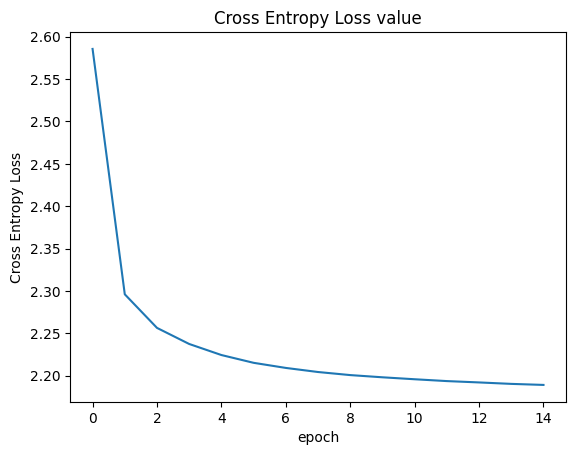

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.title('Cross Entropy Loss value')
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch')
plt.show()